In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Earthquakes_database.csv')
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
df = df.dropna(how='any', axis=1)  # 1. remove columns with any null values
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [4]:
df[['Day','Month','Year']] = df.Date.str.split('/',expand=True) # split 'Date' column into 'Day', 'Month', 'Year'
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status,Day,Month,Year
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1,2,1965
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1,4,1965
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1,5,1965
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1,8,1965
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1,9,1965


In [5]:
# cut 'Depth' into 'shallow', 'deep', 'very deep'
bins = [0, 70, 300, df['Depth'].max()]
labels = ['shallow', 'deep', 'very deep']
df['Depth Category'] = pd.cut(df['Depth'], bins=bins, labels=labels)
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status,Day,Month,Year,Depth Category
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1,2,1965,deep
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1,4,1965,deep
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1,5,1965,shallow
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1,8,1965,shallow
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1,9,1965,shallow


In [6]:
# reshaping using stack() and unstack()
stacked = df.stack()
unstacked = stacked.unstack()
stacked.describe()

count     374413
unique    101506
top           US
freq       51438
dtype: object

In [7]:
unstacked.describe()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status,Day,Month,Year,Depth Category
count,23412,23412,23412.000,23412.000,23412,23412.0,23412.0,23412,23412,23412,23412,23412,23412,23409,23409,23239
unique,12401,20472,20676.000,21474.000,4,3485.0,64.0,23412,13,48,24,2,15,31,52,3
top,3/11/2011,2:56:58,-5.902,126.777,Earthquake,10.0,5.5,ISCGEM860706,US,US,US,Reviewed,3,11,2011,shallow
freq,128,5,5.000,5.000,23232,3911.0,4685.0,1,20630,20350,10458,20773,2113,905,712,18522


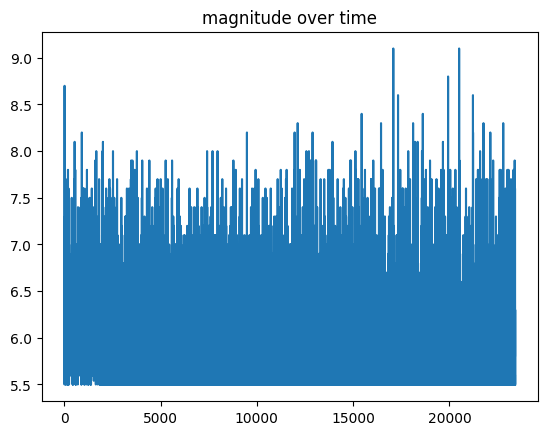

In [8]:
# line
plt.figure()
df['Magnitude'].plot(kind='line')
plt.title('magnitude over time')
plt.show()


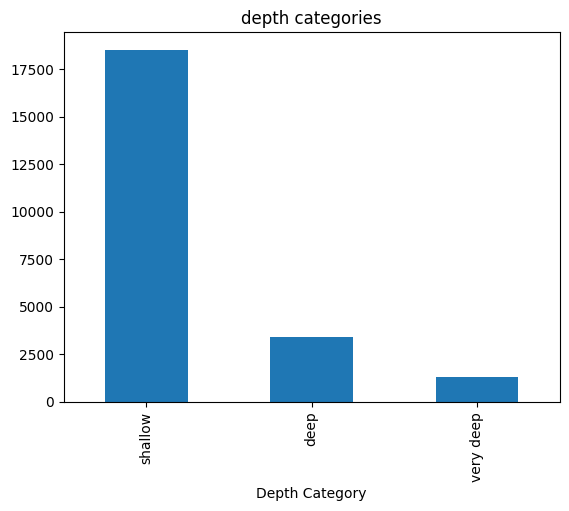

In [9]:
# bar
plt.figure()
df['Depth Category'].value_counts().plot(kind='bar')
plt.title('depth categories')
plt.show()

<Figure size 640x480 with 0 Axes>

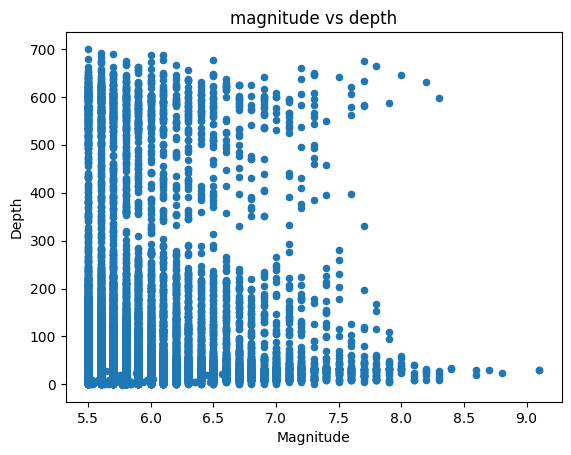

In [10]:
# scatter
plt.figure()
df.plot(kind='scatter', x='Magnitude', y='Depth')
plt.title('magnitude vs depth')
plt.show()

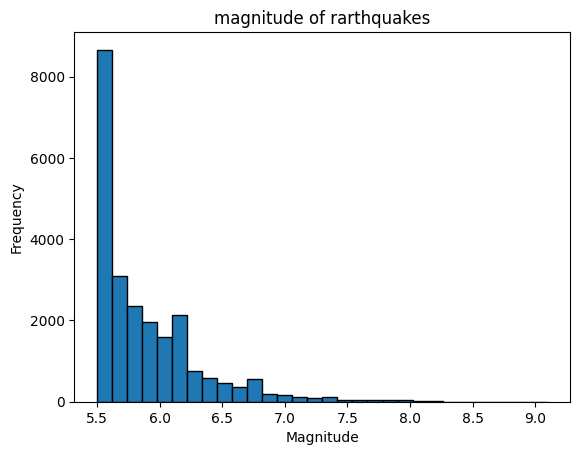

In [11]:
# histogram
plt.figure()
plt.hist(df['Magnitude'], bins=30, edgecolor='black')
plt.title('magnitude of rarthquakes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

In [16]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df_resampled = df.set_index('Date').resample('M').size()
print(df_resampled.head())

Date
1965-01-31    13
1965-02-28    54
1965-03-31    38
1965-04-30    33
1965-05-31    22
dtype: int64
